## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

<img src=''>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [2]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

Forward

In [3]:
# сделаем предсказание
output = np.dot(X, weights) + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [4]:
# ошибка - Усреднение по всем ошибкам
np.mean((y - pred) ** 2)

0.2557259944893541

Backward

In [5]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
print(dsigm)
db = dsigm * sigmoid_deriv(output)
print(db)
da = 1 * db
print(da)
# Для получения единичного значения градиента  w0  матрично умножим b на единичкую матрицу 
dw0 = np.ones((X.shape[0])) @ db
print(dw0)
# Для получения единичного значения градиента  w1  матрично умножим (da * X) на единичкую матрицу 
dw1 = np.ones((X.shape[0])) @ (da * X)
#  или dw1 = da.T @ X
print(dw1)

[[ 1.34535694]
 [-0.48561576]]
[[ 0.29622358]
 [-0.08928153]]
[[ 0.29622358]
 [-0.08928153]]
[0.20694205]
[-0.08928153]


In [6]:
# обновим параметры
bias -= dw0
weights -= dw1

In [7]:
# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.62559906],
       [0.73491143]])

In [8]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))
        grad_bias = np.sum(error * sigmoid_deriv(output), keepdims=1)
        weights -= grad
        bias -= grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights) + bias)
    return output

In [9]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 10000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[13.60579935]] [[-6.71988778]]


In [10]:
user_inp1, user_inp2 = 0, 1
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 0 1
Предсказание нейронной сети: 
[[0.00120522]
 [0.99897896]]


### Нейрон для многоклассовой классификации <a class='acnhor' id='multiclass'>

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

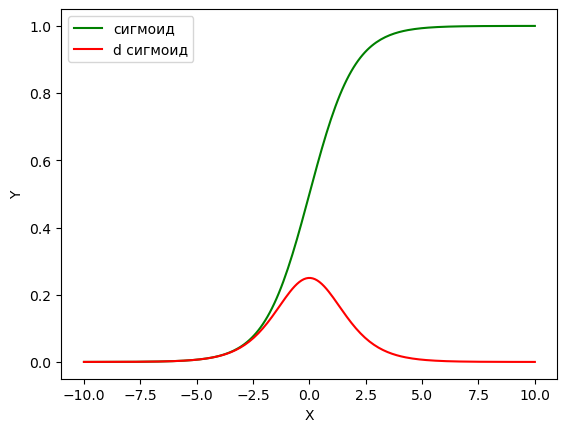

In [12]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
dY = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, dY, '-r', label='d сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(1797, 64)


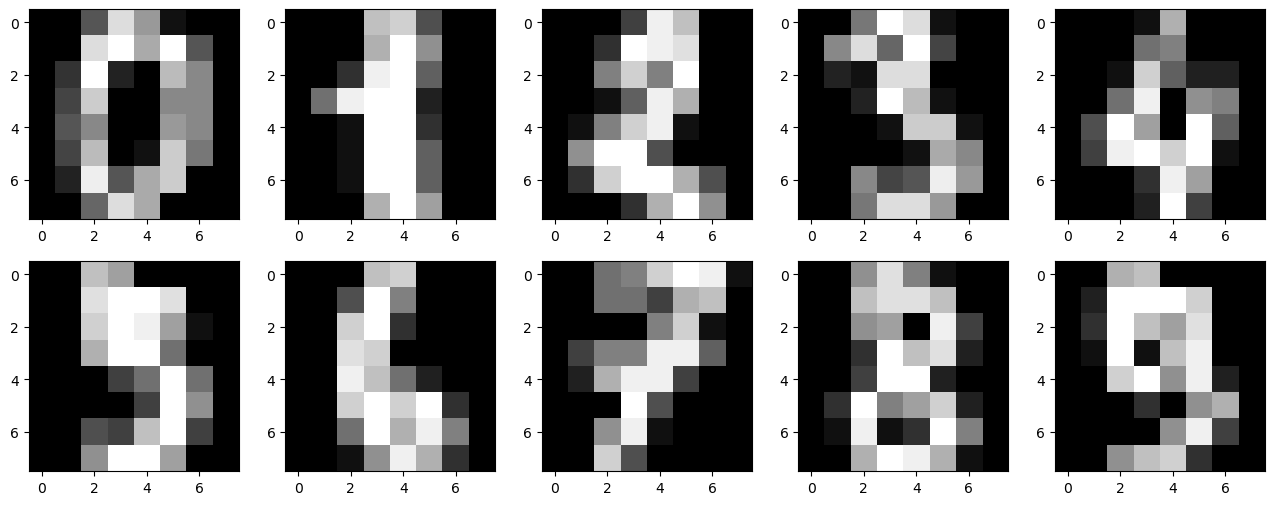

In [13]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [14]:
y.shape

(1797,)

In [15]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [16]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [17]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [18]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [19]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        #weights = weights - 0.01 * grad
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [20]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [21]:
weights.size

640

Пример нашей нейронной сети


<img src="https://drive.google.com/uc?id=1WVFYOM5vIl8ooYzyB5kFhBrRLc4su7_K" width=200px />

In [22]:
# запуск тренировки нейронной сети 
epochs = 100
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
2


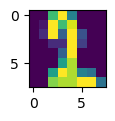

In [23]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [24]:
run_nn(X_test[ind])

array([4.00679909e-05, 1.06836868e-01, 9.88660595e-01, 3.91591231e-03,
       1.44830754e-04, 3.30405708e-03, 2.78808301e-04, 4.76969873e-04,
       1.06499332e-03, 3.19384061e-03])

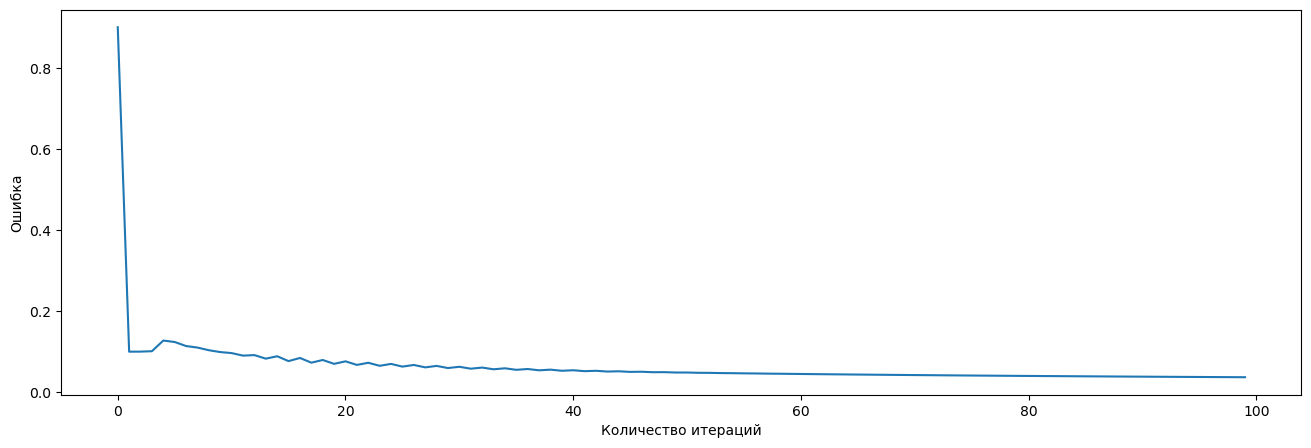

In [25]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

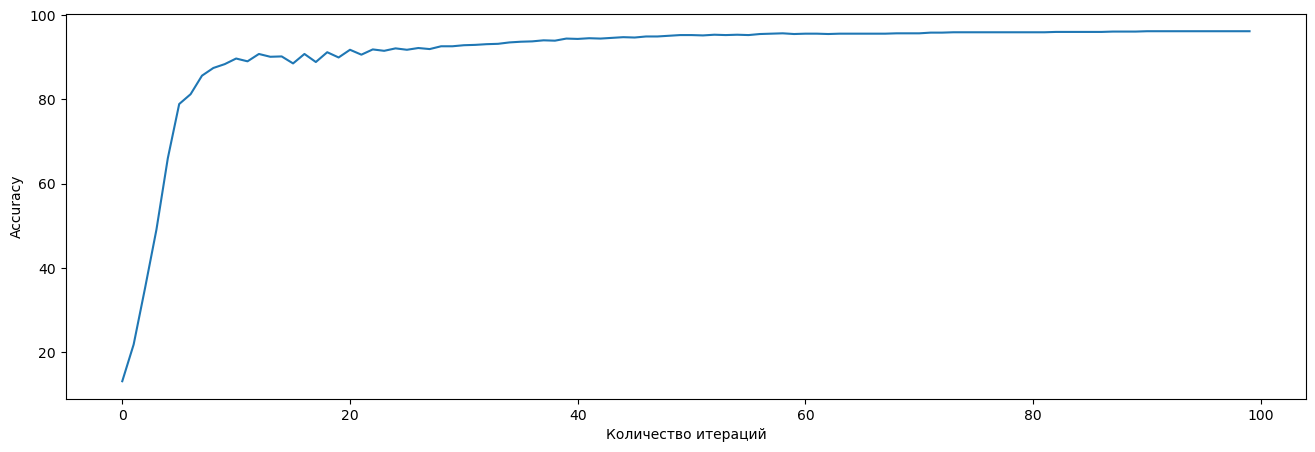

In [26]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [27]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 94.61%


## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [95]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
# neuron_numb = 10 # accuracy на тесте 68.18%
# neuron_numb = 20 # accuracy на тесте 77.27%
# neuron_numb = 40 # accuracy на тесте 73.57%
neuron_numb = 50 # accuracy на тесте 80.30%
# neuron_numb = 55 # accuracy на тесте 75.76%
# neuron_numb = 75 # accuracy на тесте 75.25%

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
# learning_rate = 0.1 # accuracy на тесте 80.30% при neuron_numb = 50
# learning_rate = 0.05 # accuracy на тесте 83.33% при neuron_numb = 50
learning_rate = 0.01 # accuracy на тесте 93.43% при neuron_numb = 50
# learning_rate = 0.001 #accuracy на тесте 30.64% при neuron_numb = 50


# количество итераций
# num_epochs = 50 при learning_rate = 0.01 accuracy на тесте 88.89% при neuron_numb = 50
# num_epochs = 100 при learning_rate = 0.01 accuracy на тесте 93.43% при neuron_numb = 50
# num_epochs = 125 при learning_rate = 0.01 accuracy на тесте 94.11% при neuron_numb = 50
# num_epochs = 150 при learning_rate = 0.01 accuracy на тесте 94.78% при neuron_numb = 50
# num_epochs = 175 # при learning_rate = 0.01 accuracy на тесте 95.45% при neuron_numb = 50
num_epochs = 250 # при learning_rate = 0.01 accuracy на тесте 95.96% при neuron_numb = 50

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    # sigmoid_deriv - Для классификации
    # relu_deriv - Для регрессии
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

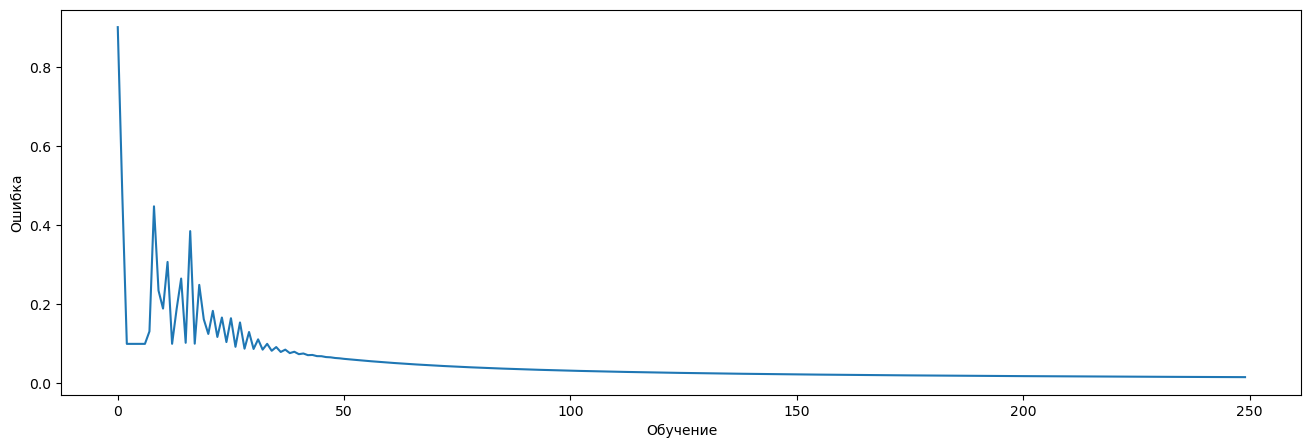

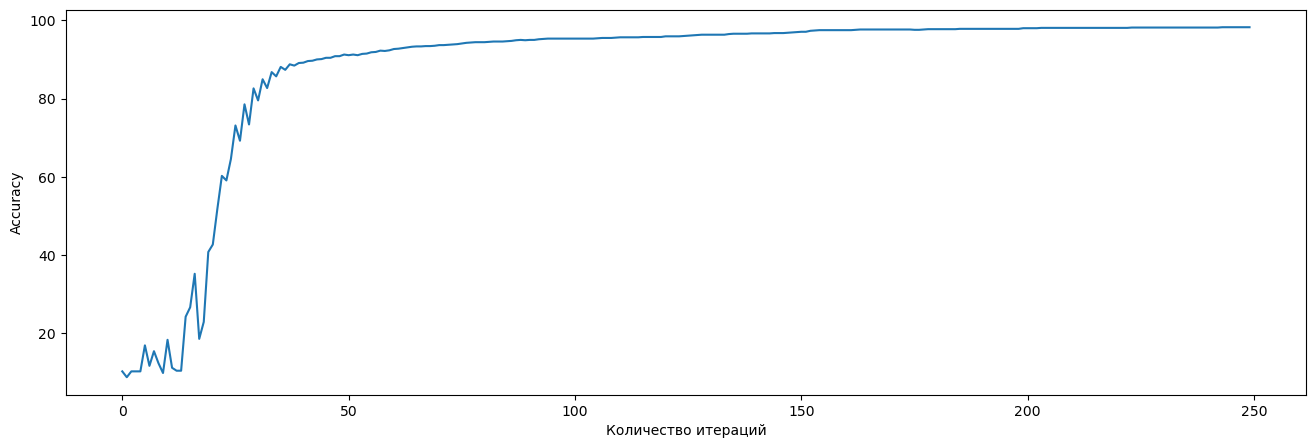

In [96]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [97]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

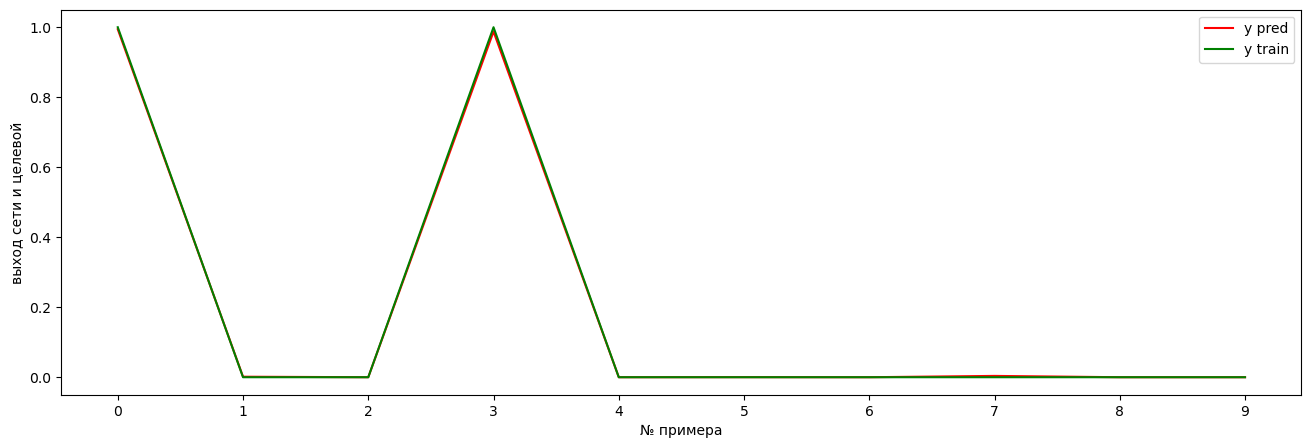

accuracy на обучении 98.25%


In [98]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

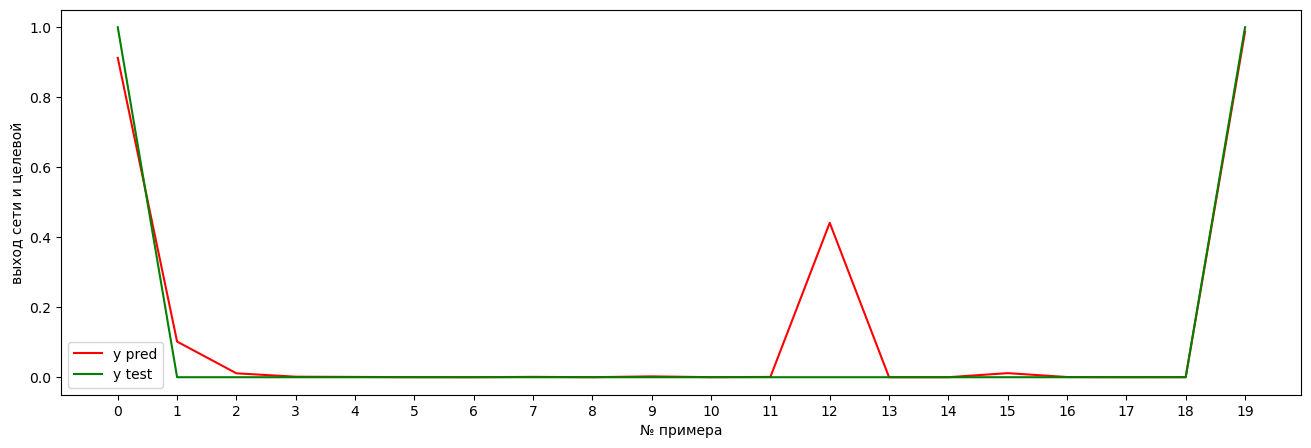

accuracy на тесте 95.96%


In [99]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

__лучший показатель accuracy на тесте 95.96%__ получен при следующих настройках neuron_numb = 50, learning_rate = 0.01, num_epochs = 250